In [1]:
import pandas as pd
import numpy as np

#data preprocessing
from scipy.stats import kurtosis
from scipy.stats import skew
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#coefficient generator
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

#cluster model
from sklearn_extra.cluster import KMedoids

#xgboost and LR
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

#dimension reduction
from sklearn.decomposition import PCA

#graph
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
pak = pd.read_csv("C:\\Users\\king0\\OneDrive\\鄧惠文專題\\data\\PAKDD2010_Modeling_Data.txt", sep="\t", header=None)

In [5]:
pak.columns = ['ID', 'CLERK_TYPE', 'PAY_DAY', 'SUBMISSION_TYPE', 'N_ADD_CARDS', 'ADDRESS_TYPE', 'SEX', 'MARITAL', 'N_DEPENDANTS',
 'EDUC_LEVEL', 'STATE_BIRTH', 'CITY_BIRTH', 'NACIONALITY', 'RESID_STATE', 'RESID_CITY', 'RESID_BOROUGH',
 'FLAG_RESID_PHONE', 'RESID_PHONE_CODE', 'RESID_TYPE', 'MONTHS_IN_RESID', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL',
 'MONTH_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMER_EXP', 'FLAG_OTHER_CARDS',
 'N_BANK_ACCOUNTS', 'N_SPECIAL_ACCOUNTS', 'ASSETS', 'N_CARS', 'COMPANY', 'PROF_STATE', 'PROF_CITY',
 'PROF_BOROUGH', 'FLAG_PROF_PHONE', 'PROF_PHONE_CODE', 'MONTHS_IN_JOB', 'PROF_CODE', 'OCCUP_TYPE', 'MATE_PROF_CODE',
 'MATE_EDUC_LEVEL', 'FLAG_ADDRESS_DOCU', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'FLAG_ACSP_RECORD',
 'AGE', 'RESID_ZIP', 'PROF_ZIP', 'TARGET']

pak = pak[['TARGET', 'PAY_DAY', 'N_DEPENDANTS', 'MONTHS_IN_RESID', 'MONTH_INCOME', 'OTHER_INCOMES', 'N_BANK_ACCOUNTS', 'N_SPECIAL_ACCOUNTS',
           'ASSETS', 'N_CARS', 'MONTHS_IN_JOB', 'AGE']]

In [6]:
pak

,TARGET,PAY_DAY,N_DEPENDANTS,MONTHS_IN_RESID,MONTH_INCOME,OTHER_INCOMES,N_BANK_ACCOUNTS,N_SPECIAL_ACCOUNTS,ASSETS,N_CARS,MONTHS_IN_JOB,AGE
0,1,5,1,15.0,900.00,0.0,0,0,0.0,0,0,32
1,1,15,0,1.0,750.00,0.0,0,0,0.0,0,0,34
2,0,5,0,NaN,500.00,0.0,0,0,0.0,0,0,27
3,0,20,0,NaN,500.00,0.0,0,0,0.0,0,0,61
4,1,10,0,12.0,1200.00,0.0,0,0,0.0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,10,2,14.0,1451.00,0.0,1,1,0.0,1,0,36
49996,0,25,0,15.0,450.00,0.0,0,0,0.0,0,0,21
49997,0,5,3,5.0,1555.00,0.0,0,0,0.0,0,0,41
49998,1,1,1,NaN,1443.27,0.0,0,0,0.0,0,0,28


In [7]:
pak.isnull().sum()

TARGET                   0
PAY_DAY                  0
N_DEPENDANTS             0
MONTHS_IN_RESID       3777
MONTH_INCOME             0
OTHER_INCOMES            0
N_BANK_ACCOUNTS          0
N_SPECIAL_ACCOUNTS       0
ASSETS                   0
N_CARS                   0
MONTHS_IN_JOB            0
AGE                      0
dtype: int64

In [8]:
y = pak['TARGET'].rename('y')
X = pak.drop(columns='TARGET').rename(columns={'PAY_DAY': 'x1', 
                                                'N_DEPENDANTS': 'x2',
                                                'MONTHS_IN_RESID': 'x3',
                                                'MONTH_INCOME' : 'x5',
                                                'OTHER_INCOMES': 'x6',
                                                'N_BANK_ACCOUNTS': 'x7',
                                                'N_SPECIAL_ACCOUNTS': 'x8',                                            
                                                'ASSETS': 'x9',
                                                'N_CARS': 'x10',
                                                'MONTHS_IN_JOB': 'x11',
                                                'AGE': 'x12'})

step1-1: Log transformation

In [9]:
for col in X.columns :
    origin_mean = X[col].describe()['mean']
    min_number = 10**(int(str("%e"%origin_mean)[-3:])-6)
    data = X[col] + min_number
    if  np.isnan(kurtosis(data)) :
        data = data.dropna()
    if kurtosis(data) > 10 :
        X[col] = pd.DataFrame(np.log(data))

step1-2: Z-scaling

In [10]:
scalor = StandardScaler()
for col in X.columns :
    X[col] = scalor.fit_transform(pd.DataFrame(X[col]))

step1-3: fill missing value

In [11]:
X['x4'] = X['x3'].isnull()*1
X = X.fillna(0)
order = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']
X = X.reindex(columns=order)

In [12]:
# show table
summary_stat = np.round(X.describe(), 1)
summary_stat.loc['skewness'] = np.round(skew(X), 1)
summary_stat.loc['kurtosis'] = np.round(kurtosis(X), 1)
summary_stat = summary_stat.drop(['25%', 'count', '75%'])

temp = np.round(y.describe().drop(['25%', 'count', '75%']), 1)
temp['skewness'] = np.round(skew(y), 1)
temp['kurtosis'] = np.round(kurtosis(y), 1)
summary_stat['y'] = temp

order = ['y','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']
summary_stat.reindex(columns=order).T
#until this step, everything fits on paper 

,mean,std,min,50%,max,skewness,kurtosis
y,0.3,0.4,0.0,0.0,1.0,1.1,-0.8
x1,-0.0,1.0,-1.8,-0.4,1.8,0.5,-0.6
x2,-0.0,1.0,-0.7,-0.7,1.9,0.7,-1.4
x3,0.0,1.0,-0.9,-0.3,20.5,2.0,10.1
x4,0.1,0.3,0.0,0.0,1.0,3.2,8.3
x5,0.0,1.0,-3.7,-0.2,12.0,1.7,7.4
x6,-0.0,1.0,-0.2,-0.2,5.7,3.9,13.3
x7,0.0,1.0,-0.7,-0.7,3.4,0.6,-1.6
x8,0.0,1.0,-0.7,-0.7,3.4,0.6,-1.6
x9,-0.0,1.0,-0.2,-0.2,5.9,4.3,16.4


step2: dimension transformation

In [13]:
#do this in step4 rescalor class

step3: data split

In [14]:
#80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

step4 :rescalor

In [39]:
class rescalor :
    def __init__(self, power, X_train, X_test, y_train) :
        poly_model = PolynomialFeatures(power, include_bias=False)
        original_train = X_train.drop(columns=['x4']) 
        original_test = X_test.drop(columns=['x4'])
        self.X_train = pd.DataFrame(np.append(poly_model.fit_transform(original_train), X_train[['x4']], axis=1))
        self.X_test = pd.DataFrame(np.append(poly_model.fit_transform(original_test), X_test[['x4']], axis=1))
        self.y_train = y_train
        self.reg_w = []
        self.lr_w = []
        self.mi_w = []
        #record weight of each rescalor
    
    def rescaling(self) :
        #fitting function
        reg = LinearRegression()
        lr = LogisticRegression()
        reg.fit(self.X_train, self.y_train)
        lr.fit(self.X_train, self.y_train)
        self.mi_w = mutual_info_classif(self.X_train, self.y_train)
        self.reg_w = reg.coef_
        self.lr_w = lr.coef_[0]        
        

    #fuck this function doesn't change test data's dimension
    def get_data(self, test=False) :
        if test :
            orig_data = self.X_test
            reg_data = self.X_test*pd.Series(self.reg_w)
            lr_data = self.X_test*pd.Series(self.lr_w)
            mi_data = self.X_test*pd.Series(self.mi_w)
        else : 
            orig_data = self.X_train
            reg_data = self.X_train*pd.Series(self.reg_w)
            lr_data = self.X_train*pd.Series(self.lr_w)
            mi_data = self.X_train*pd.Series(self.mi_w) 
               
        return orig_data, reg_data, lr_data, mi_data 

step5 : clustering、step6 : sub modeling

In [40]:
#This class deals with all process in step5, including default ratio and entropy. 
class cluster_prediction :
    def __init__(self, X_train, X_test, y_train, y_test, K) : #parameter y is literal y(not y_train or y_test)
        self.X_train = X_train.reset_index(drop=True)
        self.X_test = X_test.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)
        self.y_test = y_test.reset_index(drop=True)
        self.K = K

        #record the ratio for each group in all data
        self.cluster_prop_train = []  
        self.cluster_prop_test = []     

    def cluster_model (self, positive=False) :
        kmedoids = KMedoids(n_clusters=self.K)
        if positive :
            table = self.X_train.join(self.y_train)
            pos_table = table[table['y'] == 1].drop(columns=['y'])
            kmedoids.fit(pos_table)#model pos-case data
            self.clustermodel = kmedoids
        else :
            kmedoids.fit(self.X_train)#model all-case data
            self.clustermodel = kmedoids
    
    def cluster_predict(self, test=False) :
        if test :
            table = self.X_test.join(self.y_test)
            table['cluster'] = self.clustermodel.predict(self.X_test)
            self.cluster_X_test = table.drop(columns=['y'])
            return table
        else :
            table = self.X_train.join(self.y_train)
            table['cluster'] = self.clustermodel.predict(self.X_train) 
            self.cluster_X_train = table.drop(columns=['y'])
            return table
            #X_train with cluster label

    def default_ratio(self, test=False) : 
        ratio = []
        if test :
            table = self.cluster_predict(test=True)
            for cluster in range(0, self.K) : 
                temp = table[table['cluster']==cluster]
                self.cluster_prop_test.append(len(temp)/len(self.X_test)) #group's proportion in all data
                ratio.append(sum(temp['y'])/len(temp)) #group's default ratio
            self.ratio_test = ratio
        else :    
            table = self.cluster_predict()
            for cluster in range(0, self.K) : 
                temp = table[table['cluster']==cluster]
                self.cluster_prop_train.append(len(temp)/len(self.X_train)) 
                ratio.append(sum(temp['y'])/len(temp)) 
            self.ratio_train = ratio
        return ratio

    def submodel_auc(self, test=False) :
        lr_proba = []
        xgb_proba = []
        label_y = []
        train_all_table = self.cluster_X_train.join(self.y_train)
        test_all_table  = self.cluster_X_test.join(self.y_test)
        #因為要知道對應的y是多少，所以使用all_table
        for cluster in range(0, self.K) :
            train_table = train_all_table[train_all_table['cluster']==cluster] 
            test_table =  test_all_table[test_all_table['cluster']==cluster] 
            lrmodel = LogisticRegression().fit(train_table.drop(columns=['y', 'cluster']), train_table['y'])
            xgbmodel = xgb.XGBClassifier().fit(train_table.drop(columns=['y', 'cluster']), train_table['y'])
            if test :
                lr_proba = np.concatenate((lrmodel.predict_proba(test_table.drop(columns=['y', 'cluster']))[:,1], lr_proba))
                xgb_proba = np.concatenate((xgbmodel.predict_proba(test_table.drop(columns=['y', 'cluster']))[:,1], xgb_proba))
                label_y = np.concatenate((test_table['y'], label_y))
            else :
                lr_proba = np.concatenate((lrmodel.predict_proba(train_table.drop(columns=['y', 'cluster']))[:,1], lr_proba))
                xgb_proba = np.concatenate((xgbmodel.predict_proba(train_table.drop(columns=['y', 'cluster']))[:,1], xgb_proba))
                label_y = np.concatenate((train_table['y'], label_y))

            fpr, tpr, threshold = roc_curve(label_y, lr_proba)
            lr_auc = auc(fpr, tpr)
            fpr, tpr, threshold = roc_curve(label_y, xgb_proba)
            xgb_auc = auc(fpr, tpr)
        return  [lr_auc, xgb_auc]
            

    def entropy(self, test=False) : #give it a 'test' parameter 
        h_mean = 0
        if test :
            for p, q in zip(self.ratio_test, self.cluster_prop_test) :
                if p == 0 or p==1:
                    h = 0
                else :
                    h = -(p*math.log2(p) + (1-p)*math.log2(1-p))
                h_mean += q*h
            return h_mean
        
        for p, q in zip(self.ratio_train, self.cluster_prop_train) :
            if p == 0 or p==1:
                h = 0
            else :
                h = -(p*math.log2(p) + (1-p)*math.log2(1-p))
            h_mean += q*h
        return h_mean     

In [41]:
# default rate data 
upper = 40000
rescalor_data = rescalor(1, X_train[:upper], X_test, y_train[:upper])
rescalor_data.rescaling()
reg_w_1, lr_w_1, mi_w_1 = rescalor_data.reg_w, rescalor_data.lr_w, rescalor_data.mi_w
orig_train_1, reg_train_1, lr_train_1, mi_train_1 = rescalor_data.get_data()
orig_test_1, reg_test_1, lr_test_1, mi_test_1 = rescalor_data.get_data(test=True)

rescalor_data = rescalor(2, X_train[:upper], X_test, y_train[:upper])
rescalor_data.rescaling()
reg_w_2, lr_w_2, mi_w_2 = rescalor_data.reg_w, rescalor_data.lr_w, rescalor_data.mi_w
orig_train_2, reg_train_2, lr_train_2, mi_train_2 = rescalor_data.get_data()
orig_test_2, reg_test_2, lr_test_2, mi_test_2 = rescalor_data.get_data(test=True)

In [140]:
#check consistency of the coefficient table
ew_w_1 = np.ones(len(reg_w_1))
weight_1 = [ew_w_1, reg_w_1, lr_w_1, mi_w_1]
ew_w_2 = np.ones(len(reg_w_2))
weight_2 = [ew_w_2, reg_w_2, lr_w_2, mi_w_2]

print('origin data')
print(np.round(pd.DataFrame(np.percentile(weight_1, [0, 10, 25, 50, 75, 90, 100], axis=1))\
.rename(columns={0:'EW', 1:'REG', 2:'LR', 3:'MI'}, 
        index={0:'min', 1:'10%', 2:'25%', 3:'median', 4:'75%', 5:'90%', 6:'max'}).T, 2))

print('quadratic data')
print(np.round(pd.DataFrame(np.percentile(weight_2, [0, 10, 25, 50, 75, 90, 100], axis=1))\
.rename(columns={0:'EW', 1:'REG', 2:'LR', 3:'MI'}, 
        index={0:'min', 1:'10%', 2:'25%', 3:'median', 4:'75%', 5:'90%', 6:'max'}).T, 2))

origin data
      min   10%   25%  median   75%   90%   max
EW   1.00  1.00  1.00    1.00  1.00  1.00  1.00
REG -0.36 -0.06 -0.02   -0.00  0.03  0.12  0.79
LR  -0.87 -0.29 -0.12   -0.01  0.13  0.25  0.67
MI   0.00  0.00  0.00    0.00  0.00  0.00  0.01
quadratic data
              min           10%   25%  median   75%          90%           max
EW   1.000000e+00  1.000000e+00  1.00     1.0  1.00         1.00  1.000000e+00
REG -1.099236e+10 -1.362537e+08 -0.17     0.0  0.07  89299883.24  1.566143e+10
LR  -4.500000e-01 -5.000000e-02 -0.01     0.0  0.01         0.05  6.300000e-01
MI   0.000000e+00  0.000000e+00  0.00     0.0  0.00         0.00  2.000000e-02


In [ ]:
dataset_train = [orig_train_1, reg_train_1, lr_train_1, mi_train_1, 
                 orig_train_2, reg_train_2, lr_train_2, mi_train_2]

dataset_test = [orig_test_1, reg_test_1, lr_test_1, mi_test_1,
                orig_test_2, reg_test_2, lr_test_2, mi_test_2] 

ratio_train, ratio_test, entropy_train, entropy_test, auc_train, auc_test = [], [], [], [], [], []  
for train_data, test_data in zip(dataset_train, dataset_test):# <-different rescaled data
    ratio_set_train, entropy_set_train, ratio_set_test,  entropy_set_test, auc_set_train, auc_set_test= [], [], [], [], [], []
    #auc_set_train = [] <- [[lr, xgb](k=2), [lr, xgb](k=3)]
    
    for K in range(1, 10) :
        C = cluster_prediction(train_data[:600], test_data[:600], y_train[:600], y_test[:600], K)
        C.cluster_model()
        ratio_tr = C.default_ratio()
        ratio_te = C.default_ratio(test=True)
        if K > 1 :
            ratio_set_train.append(ratio_tr)
            entropy_set_train.append(C.entropy())
            ratio_set_test.append(ratio_te)
            entropy_set_test.append(C.entropy(test=True))
        if K <= 4:
            auc_set_train.append(C.submodel_auc())
            auc_set_test.append(C.submodel_auc(test=True))

    ratio_train.append(ratio_set_train)            # [[EW_ratio_1], [REG_ratio_1], [LR_ratio_1], [MI_ratio_1], [EW_ratio_2], [REG_ratio_2], [LR_ratio_2], [MI_ratio_2],...]   
                                                   # in [EW_ratio_1] -> [[0.06], [0.02, 0.14], [0.012, 0.07, 0.03], [0.018, 0.019, 0.1, 0.12],...]      
    entropy_train.append(entropy_set_train) 
    ratio_test.append(ratio_set_test)
    entropy_test.append(entropy_set_test)
    auc_train.append(auc_set_train)                
    # [[[EW_K=1_D=1], [EW_K=2_D=1], [EW_K=3_D=1]],
    #  [[REG_K=1_D=1],[REG_K=2_D=1],[REG_K=3_D=1]],
    #  [[LR_K=1]_D=1,[LR_K=2_D=1],[LR_K=3_D=1]], 
    #  [[MI_K=1_D=1],[MI_K=2_D=1],[MI_K=3_D=1]],
    #  [[EW_K=1_D=2], [EW_K=2_D=2], [EW_K=3_D=2]], ...]
    auc_test.append(auc_set_test)
    #auc: 1.指定要哪一種scalored data以及什麼維度 2. 要K為多少的 3.得到[lr, xgb]


ratio_trainp, ratio_testp, entropy_trainp, entropy_testp, auc_trainp, auc_testp = [], [], [], [], [], [] 
for train_data, test_data in zip(dataset_train, dataset_test):
    ratio_set_train, entropy_set_train, ratio_set_test,  entropy_set_test, auc_set_train, auc_set_test= [], [], [], [], [], []    
    for K in range(1, 10) :
        Cp = cluster_prediction(train_data[:600], test_data[:600], y_train[:600], y_test[:600], K)
        Cp.cluster_model(positive=True)
        ratio_tr = Cp.default_ratio()
        ratio_te = Cp.default_ratio(test=True)
        if K > 1 :
            ratio_set_train.append(ratio_tr)
            entropy_set_train.append(Cp.entropy())
            ratio_set_test.append(ratio_te)
            entropy_set_test.append(Cp.entropy(test=True))
        if K <= 4:
            auc_set_train.append(Cp.submodel_auc())
            auc_set_test.append(Cp.submodel_auc(test=True))

    ratio_trainp.append(ratio_set_train)                 
    entropy_trainp.append(entropy_set_train) 
    ratio_testp.append(ratio_set_test)
    entropy_testp.append(entropy_set_test)
    auc_trainp.append(auc_set_train)                
    auc_testp.append(auc_set_test)

In [ ]:
#graph function 
def default_rate(alldata) : #all includes four type of rescaling data
    fig = make_subplots(rows=2, 
                        cols=4, 
                        shared_yaxes=True,
                        subplot_titles=('All, EW', 'All, REG', 'All, LR', 'ALL, MI',
                                        'POS, EW', 'POS, REG', 'POS, LR', 'POS, MI')) 
    row, col = 0, 0
    color = 'blue'
    name = 'train default rate'
    legend = True
    average_line = True
    for dataset in alldata : 
        # allEW(tr), allREG(tr), allLR(tr), allMI(tr), 
        # posEW(tr), posREG(tr), posLR(tr), posMI(tr),
        # allEW(te), allREG(te), allLR(te), allMI(te), 
        # posEW(te), posREG(te), posLR(te), posMI(te)
        if row > 7 :
            color = 'red'
            name = 'test default rate'
            legend = True
            average_line = False
        row, col = row%8, col%8                     
        coordinate_x, coordinate_y = [], []
        for data, x in zip(dataset, range(2, 10)) : #different Ks
            for rate in data :  #different groups
                coordinate_x.append(x)
                coordinate_y.append(rate) 
        fig.append_trace(go.Scatter(x = coordinate_x, 
                                    y = coordinate_y, 
                                    mode='markers',
                                    marker=dict(color=color),
                                    name=name,
                                    showlegend=legend),
                                    row=(row//4)+1, col=(col%4)+1)  
        if average_line :
            fig.append_trace(go.Scatter(x = [1, 10],
                                        y = [0.067, 0.067],
                                        mode='lines',
                                        marker=dict(color='black'),
                                        name='all data default rate',
                                        showlegend=legend),
                                        row=(row//4)+1, col=(col%4)+1)         
        col += 1
        row += 1 
        legend = False
    fig.update_layout(xaxis1=dict(dtick=1), xaxis2=dict(dtick=1), 
                      xaxis3=dict(dtick=1), xaxis4=dict(dtick=1),
                      xaxis5=dict(dtick=1), xaxis6=dict(dtick=1), 
                      xaxis7=dict(dtick=1), xaxis8=dict(dtick=1),
                      xaxis1_title_text="K",xaxis2_title_text="K",
                      xaxis3_title_text="K",xaxis4_title_text="K",
                      xaxis5_title_text="K",xaxis6_title_text="K",
                      xaxis7_title_text="K",xaxis8_title_text="K",
                      yaxis1_title_text="default rate", yaxis5_title_text="default rate")
    
    fig.update(layout_yaxis1_range = [0, 0.6],
               layout_yaxis5_range = [0, 0.6],
               layout_xaxis1_range = [1.5, 9.5],
               layout_xaxis2_range = [1.5, 9.5],
               layout_xaxis3_range = [1.5, 9.5],
               layout_xaxis4_range = [1.5, 9.5],
               layout_xaxis5_range = [1.5, 9.5],
               layout_xaxis6_range = [1.5, 9.5],
               layout_xaxis7_range = [1.5, 9.5],
               layout_xaxis8_range = [1.5, 9.5])

    fig.update_layout(height=800, width=800)
    # fig.write_html("default_rate.html")
    fig.show()


def entropy_trend(alldata) :
    #[[ALL, original], [ALL, quadratic], [ALL, cubic], [POS, original], [POS, quadratic], [POS, cubic]]
    #in [ALL, original], [[train_EW], [train_REG], [train_LR], [train_MI], [test_EW], [test_REG], [test_LR], [test_MI]]                                                        
    row = 0
    col = 0
    legend = True
    name = ['EW, train', 'REG, train', 'LR, train', 'MI, train', 'EW, test', 'REG, test', 'LR, test', 'MI, test']
    color = ['blue', 'peru', 'red', 'green', 'blue', 'peru', 'red', 'green']
    fig = make_subplots(rows=2, 
                        cols=2, 
                        shared_yaxes=True,
                        subplot_titles=('All, original', 'POS, original', 'All, quadratic', 'POS, quadratic','All, cubic',  'POS, cubic'),
                        x_title='K',
                        y_title='Entropy')
    for graph in alldata : #origin(tr), quadratic(tr), cubic(tr), origin(te), quadratic(te), cubic(te),
        line = None
        index = 0
        for data in graph : #different data
            if index > 3 :
                line = "dot"
            fig.append_trace(go.Scatter(x = list(range(2, 10)), 
                                        y = data,
                                        name=name[index],
                                        line = dict(dash=line),
                                        marker=dict(color=color[index]),
                                        showlegend=legend),        
                                        row=(row%3)+1, col=(col//3)+1)   
            index += 1    
        fig.append_trace(go.Scatter(x = [2, 9], 
                                    y = [0.8275, 0.8275],
                                    name='K=1, train',
                                    marker=dict(color = 'black'),
                                    showlegend=legend),
                                    row=(row%3)+1, col=(col//3)+1)
        fig.append_trace(go.Scatter(x = [2, 9], 
                                    y = [0.8285, 0.8285],
                                    name='K=1, test',
                                    marker=dict(color = 'black'),
                                    showlegend=legend),
                                    row=(row%3)+1, col=(col//3)+1) 
        row += 1
        col += 1
        legend = False

    fig.update(layout_yaxis_range = [0.27, 0.37],
               layout_yaxis3_range = [0.27, 0.37],
               layout_yaxis5_range = [0.27, 0.37],
               layout_xaxis1_range = [1.5, 9.5],
               layout_xaxis3_range = [1.5, 9.5],
               layout_xaxis5_range = [1.5, 9.5])
    
    fig.update_layout(xaxis=dict(dtick=1), 
                      xaxis2=dict(dtick=1),
                      xaxis3=dict(dtick=1),
                      xaxis4=dict(dtick=1),
                      xaxis5=dict(dtick=1),
                      xaxis6=dict(dtick=1),
                      yaxis1=dict(dtick=0.02), 
                      yaxis2=dict(dtick=0.02),
                      yaxis3=dict(dtick=0.02),
                      yaxis4=dict(dtick=0.02),
                      yaxis5=dict(dtick=0.02),
                      yaxis6=dict(dtick=0.02))
    
    fig.update_layout(height=800, width=950)
    # fig.write_html("entropy_trend.html")
    fig.show()    
    
def AUC_comparision(alldata) :  
    #[[[test(k=1)], [train(k=1)]], [[test(k=2)], [train(k=2)]], [[test(k=3)], [train(k=3)]]]
    #in [test(k=1)] -> [[LR,ALL,test], [XGB,ALL,test], [LR,POS,test], [XGB,POS,test]]
    #in [XGB,POS,test] -> [ew, reg, lr, mi] 
    fig = make_subplots(rows = 4,
                        cols = 1,
                        subplot_titles=('Original, k=1', 'Original, k=2', 'Original, k=3', 'Original, k=4'),
                        x_title='rescalor',
                        y_title='AUC')
    databases = ['EW', 'REG', 'LR', 'MI']
    row = 1
    legend = True
    for K in alldata :
        fig.append_trace(go.Bar(name='LR,ALL,overffiting', x=databases, y=K[1][0], offsetgroup=0, marker_color='black', showlegend=legend),row = row, col = 1)
        fig.append_trace(go.Bar(name='LR,POS,overffiting', x=databases, y=K[1][2], offsetgroup=1, marker_color='black', showlegend=legend),row = row, col = 1)
        fig.append_trace(go.Bar(name='XGB,ALL,overffiting', x=databases, y=K[1][1], offsetgroup=2, marker_color='black', showlegend=legend),row = row, col = 1)
        fig.append_trace(go.Bar(name='XGB,POS,overffiting', x=databases, y=K[1][3], offsetgroup=3, marker_color='black', showlegend=legend),row = row, col = 1)
        fig.append_trace(go.Bar(name='LR,ALL,test', x=databases, y=K[0][0], offsetgroup=0, marker_color='darkblue', showlegend=legend), row = row, col = 1)
        fig.append_trace(go.Bar(name='LR,POS,test', x=databases, y=K[0][2], offsetgroup=1, marker_color='skyblue', showlegend=legend), row = row, col = 1)
        fig.append_trace(go.Bar(name='XGB,ALL,test', x=databases, y=K[0][1], offsetgroup=2, marker_color='green', showlegend=legend), row = row, col = 1)
        fig.append_trace(go.Bar(name='XGB,POS,test', x=databases, y=K[0][3], offsetgroup=3, marker_color='lightgreen', showlegend=legend), row = row, col = 1) 
                        
        fig.update_layout(barmode='group')
        row += 1
        legend = False

    fig.update_layout(height=800, width=950)
    fig.update_layout(yaxis1=dict(dtick=0.2), 
                      yaxis2=dict(dtick=0.2),
                      yaxis3=dict(dtick=0.2),
                      yaxis4=dict(dtick=0.2))
    # fig.write_html("AUC.html")
    fig.show()

In [ ]:
defaultrate_data = [ratio_train[0], ratio_train[1], ratio_train[2], ratio_train[3], 
                    ratio_trainp[0], ratio_trainp[1], ratio_trainp[2], ratio_trainp[3],
                    ratio_test[0], ratio_test[1], ratio_test[2], ratio_test[3], 
                    ratio_testp[0], ratio_testp[1], ratio_testp[2], ratio_testp[3]]

entropytrend_data = [[entropy_train[0], entropy_train[1], entropy_train[2], entropy_train[3],
                      entropy_test[0], entropy_test[1], entropy_test[2], entropy_test[3]],
                     [entropy_train[4], entropy_train[5], entropy_train[6], entropy_train[7],
                      entropy_test[4], entropy_test[5], entropy_test[6], entropy_test[7]],
                     [entropy_trainp[0], entropy_trainp[1], entropy_trainp[2], entropy_trainp[3],
                      entropy_testp[0], entropy_testp[1], entropy_testp[2], entropy_testp[3]],
                     [entropy_trainp[4], entropy_trainp[5], entropy_trainp[6], entropy_trainp[7],
                      entropy_testp[4], entropy_testp[5], entropy_testp[6], entropy_testp[7]]]

AUC_data = [[[[auc_test[0][0][0], auc_test[1][0][0], auc_test[2][0][0], auc_test[3][0][0]], 
              [auc_test[0][0][1], auc_test[1][0][1], auc_test[2][0][1], auc_test[3][0][1]], 
              [auc_testp[0][0][0], auc_testp[1][0][0], auc_testp[2][0][0], auc_testp[3][0][0]], 
              [auc_testp[0][0][1], auc_testp[1][0][1], auc_testp[2][0][1], auc_testp[3][0][1]]], 
             [[auc_train[0][0][0], auc_train[1][0][0], auc_train[2][0][0], auc_train[3][0][0]], 
              [auc_train[0][0][1], auc_train[1][0][1], auc_train[2][0][1], auc_train[3][0][1]], 
              [auc_trainp[0][0][0], auc_trainp[1][0][0], auc_trainp[2][0][0], auc_trainp[3][0][0]], 
              [auc_trainp[0][0][1], auc_trainp[1][0][1], auc_trainp[2][0][1], auc_trainp[3][0][1]]]], 
            [[[auc_test[0][1][0], auc_test[1][1][0], auc_test[2][1][0], auc_test[3][1][0]], 
              [auc_test[0][1][1], auc_test[1][1][1], auc_test[2][1][1], auc_test[3][1][1]], 
              [auc_testp[0][1][0], auc_testp[1][1][0], auc_testp[2][1][0], auc_testp[3][1][0]], 
              [auc_testp[0][1][1], auc_testp[1][1][1], auc_testp[2][1][1], auc_testp[3][1][1]]], 
             [[auc_train[0][1][0], auc_train[1][1][0], auc_train[2][1][0], auc_train[3][1][0]], 
              [auc_train[0][1][1], auc_train[1][1][1], auc_train[2][1][1], auc_train[3][1][1]], 
              [auc_trainp[0][1][0], auc_trainp[1][1][0], auc_trainp[2][1][0], auc_trainp[3][1][0]], 
              [auc_trainp[0][1][1], auc_trainp[1][1][1], auc_trainp[2][1][1], auc_trainp[3][1][1]]]], 
            [[[auc_test[0][3][0], auc_test[1][3][0], auc_test[2][3][0], auc_test[3][3][0]], 
              [auc_test[0][3][1], auc_test[1][3][1], auc_test[2][3][1], auc_test[3][3][1]], 
              [auc_testp[0][3][0], auc_testp[1][3][0], auc_testp[2][3][0], auc_testp[3][3][0]], 
              [auc_testp[0][3][1], auc_testp[1][3][1], auc_testp[2][3][1], auc_testp[3][3][1]]], 
             [[auc_train[0][3][0], auc_train[1][3][0], auc_train[2][3][0], auc_train[3][3][0]], 
              [auc_train[0][3][1], auc_train[1][3][1], auc_train[2][3][1], auc_train[3][3][1]], 
              [auc_trainp[0][3][0], auc_trainp[1][3][0], auc_trainp[2][3][0], auc_trainp[3][3][0]], 
              [auc_trainp[0][3][1], auc_trainp[1][3][1], auc_trainp[2][3][1], auc_trainp[3][3][1]]]]]

In [ ]:
default_rate(defaultrate_data)

In [ ]:
entropy_trend(entropytrend_data)

In [ ]:
AUC_comparision(AUC_data)

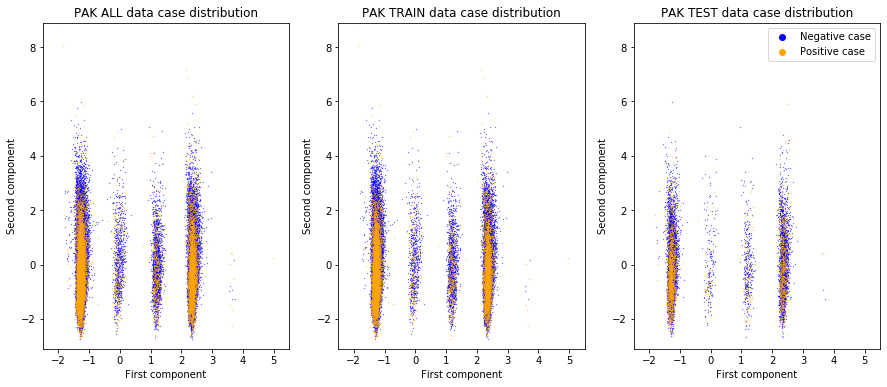

In [24]:
figure, axis = plt.subplots(1, 3, figsize=(15, 6))
pca = PCA(n_components=2)
#all data 
data = pd.DataFrame(pca.fit_transform(X))
data[3] = y
neg = data[data[3]==0].drop(columns=3)
pos = data[data[3]==1].drop(columns=3)
axis[0].scatter(neg[0], neg[1], color='blue', s=0.05)
axis[0].scatter(pos[0], pos[1],  color='orange', s=0.05)
axis[0].scatter([], [], color='blue', label='Negative case')
axis[0].scatter([], [], color='orange', label='Positive case')
axis[0].set_xlabel('First component')
axis[0].set_ylabel('Second component')
axis[0].set_title('PAK ALL data case distribution')
axis[0].set_xlim(-2.5,5.5)
axis[0].set_ylim(-3.1,8.9)

#train data
data1 = data.iloc[X_train.index]
data1[3] = y_train
neg = data1[data1[3]==0].drop(columns=3)
pos = data1[data1[3]==1].drop(columns=3)
axis[1].scatter(neg[0], neg[1], color='blue', s=0.05)
axis[1].scatter(pos[0], pos[1],  color='orange', s=0.05)
axis[1].scatter([], [], color='blue', label='Negative case')
axis[1].scatter([], [], color='orange', label='Positive case')
axis[1].set_xlabel('First component')
axis[1].set_ylabel('Second component')
axis[1].set_title('PAK TRAIN data case distribution')
axis[1].set_xlim(-2.5,5.5)
axis[1].set_ylim(-3.1,8.9)

data2 = data.iloc[X_test.index]
data2[3] = y_test
neg = data2[data2[3]==0].drop(columns=3)
pos = data2[data2[3]==1].drop(columns=3)
axis[2].scatter(neg[0], neg[1], color='blue', s=0.05)
axis[2].scatter(pos[0], pos[1],  color='orange', s=0.05)
axis[2].scatter([], [], color='blue', label='Negative case')
axis[2].scatter([], [], color='orange', label='Positive case')
axis[2].set_xlabel('First component')
axis[2].set_ylabel('Second component')
axis[2].set_title('PAK TEST data case distribution')
axis[2].set_xlim(-2.5,5.5)
axis[2].set_ylim(-3.1,8.9)
plt.legend()
plt.show()


In [ ]:
#graph with plt style
def AUC_plt(data) :
    plt.figure(figsize= (13,9))
    y_low = 50
    y_high = 100
    width = 0.2
    plt.subplot(4,1,1)
    
    
    k = 0
    
    